In [12]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt

In [13]:
def simpson(y, h):
    return np.sum(y[:-1:2] + 4 * y[1::2] + y[2::2]) * h / 3

In [14]:
def D(x, f, delta):
    return (f(x + delta) - f(x - delta)) / (2 * delta)

In [15]:
f1 = lambda m, t, x: np.cos(m * t - x * np.sin(t)) / np.pi

In [104]:
N = 150000                         # кол-во интервалов разбиения по x (в этих точках проверяем равенство)
M = 10                             # кол-во интервалов разбиения по t (по этим промежуткам берется интеграл)
a, b = 0., 2 * np.pi               # интервал x
c, d = 0., np.pi                   # интервал t
delta = 1.e-5                      # шаг для центральной производной

In [105]:
x = np.linspace(a, b, N + 1)       # массив из N + 1 точек

In [106]:
t = np.linspace(c, d, M + 1)       # массив из M + 1 точек

In [107]:
J_1 = np.array([simpson([f1(1, z, s) for z in t], (d - c) / M) for s in x])

In [108]:
DJ_0 = np.array([simpson([D(s, lambda p: f1(0, z, p), (b - a) / N) for z in t], (d - c) / M) for s in x])

In [109]:
max(abs(J_1 + DJ_0))               # искомая точность выполнения равенства j1 + dj0/dx == 0

1.2188816622682452e-10

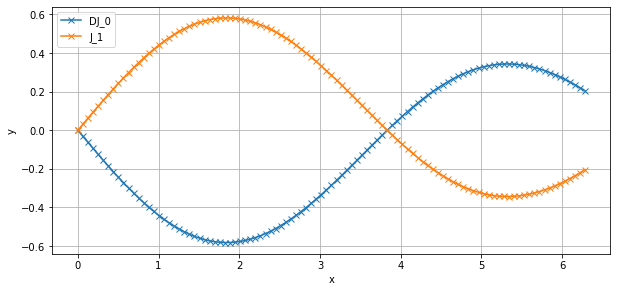

In [110]:
K = 1500
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(x[::K], DJ_0[::K], 'x-', label='DJ_0')
plt.plot(x[::K], J_1[::K], 'x-', label='J_1')
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()